 # **Master in Data Science - Machine Learning**

Authors: Frida Ibarra y Gema Romero

### **Notebook 4: Module Selection**

The goal of this step is to develop a machine learning model capable of accurately predicting the probability of a customer defaulting on a loan, considering the inherent class imbalance in this type of problem.

Data Balancing:
- Analysis: Assess the degree of imbalance between the classes (paying customers vs. defaulting customers).
- Treatment: Apply oversampling (SMOTE) or undersampling techniques to balance the dataset and mitigate bias in the model.

Model Selection:
- Exploration: Experiment with a variety of algorithms, including logistic regression, decision trees, random forest, and gradient boosting.
- Comparison: Evaluate the performance of each model using relevant metrics such as accuracy, recall, F1-score, and AUC-ROC.

Cross-Validation:
- Robustness: Employ cross-validation to ensure the model generalizes well to new data and prevent overfitting.

Hyperparameter Tuning:
- Optimization: Utilize hyperparameter tuning techniques (grid search, random search) to find the optimal configuration for each model.

Model Selection:
- Evaluation: Compare the trained models and select the one that achieves the best results in terms of metrics and generalization ability.

#### Libraries

In [46]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import warnings
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import re
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from functools import partial
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from sklearn.metrics import make_scorer, fbeta_score, classification_report
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV
from joblib import dump
import os
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from joblib import dump

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Insert Functions

In [47]:
sys.path.append('../src') 
import functions_src as fa  
sys.path.remove('../src')

#Seed
seed = 25

#### Dataset

In [48]:
#paths
path_data = '../data/application_data.csv'
path_data_train_cut = '../data/Processing_data/df_loans_train_cut.csv'
path_data_test_cut = '../data/Processing_data/df_loans_test_cut.csv'

#insert data
df_loans = pd.read_csv(path_data)
df_loans_train_cut = pd.read_csv(path_data_train_cut)
df_loans_test_cut = pd.read_csv(path_data_test_cut)

df_loans_train_cut.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE_missing,NAME_TYPE_SUITE_Group of people,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Unemployed,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Co-op apartment,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMIN_MODE,LIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE_missing,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,HOUSETYPE_MODE_missing,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_specific housing,WALLSMATERIAL_MODE_missing,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,EMERGENCYSTATE_MODE_missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,FLAG_DOCUMENT_2,FLAG_DOCUMENT_8,FLAG_DOCUMENT_11,FLAG_DOCUMENT_16,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_EDUCATION_TYPE_ORDINAL,WEEKDAY_APPR_PROCESS_START_ORDINAL,OCCUPATION_TYPE_MEAN,TARGET
0,0,-0.786989,0.324103,-0.324103,0.722057,-0.722031,-0.004032,0.716969,-0.716969,1.503079,-1.503079,0.807356,-0.320471,0.654397,-0.120991,0.491406,-0.065189,-0.029781,0.967741,-0.550989,-0.275698,-0.004508,-0.006049,-0.008313,0.752689,-0.327059,-0.235098,-0.262467,-0.417105,0.356817,-0.194440,-0.225169,-0.127727,-0.093034,-0.060291,0.968781,-0.477982,-0.146275,0.002016,0.468486,-0.499666,0.044123,-0.625627,-0.245406,0.930833,1.860366,1.925206,-1.246885,-0.206529,2.136860,-0.674873,-2.822123,-2.290413,-0.771477,0.012981,-0.165351,-0.368302,-0.082579,-0.083397,-0.140632,-0.149356,-0.099818,-0.230110,0.026071,-0.168474,-0.355921,-0.050833,-0.070287,-0.159456,-0.094503,-0.237963,0.013252,-0.166514,-0.365151,-0.078828,-0.082291,-0.141441,-0.151557,-0.098784,-0.231454,0.678940,-0.201525,-0.561708,-0.136934,-0.136317,0.995603,-0.978230,-0.063015,-0.069778,0.982008,-0.075816,-0.072802,1.052419,-1.036392,-0.087849,-0.005703,-0.297606,-0.061999,-0.100151,-0.018809,-0.070444,-0.058838,-0.155317,-0.270689,2.269190,1.827981,-0.582747,-0.295316,-0.659055,0
1,1,0.474027,0.324103,-0.324103,-1.384932,1.384982,-0.004032,-1.394761,1.394761,-0.665301,0.665301,-0.577365,0.041994,1.012907,1.080520,0.978511,-0.065189,-0.029781,0.967741,-0.550989,-0.275698,-0.004508,-0.006049,-0.008313,0.752689,-0.327059,-0.235098,-0.262467,-0.417105,0.356817,-0.194440,-0.225169,-0.127727,-0.093034,-0.060291,0.495804,-0.475964,0.558202,0.002016,0.468486,-0.499666,0.044123,-0.625627,-0.245406,-0.166762,1.860366,1.925206,0.898051,-0.206529,-0.467976,0.643345,-1.676714,-0.205557,1.056196,0.012981,-0.

In [49]:
# Drop the first columns as it is duplicated
df_loans_train_cut = df_loans_train_cut.drop('Unnamed: 0',axis=1)
df_loans_test_cut = df_loans_test_cut.drop('Unnamed: 0',axis=1)

In [50]:
# Verify the dimensions of the dataframes after droping out the variables which were not considered relevant
print(df_loans_test_cut.shape)
print(df_loans_train_cut.shape)

(61503, 109)
(246008, 109)


The number of variables has been reduced from 165 to 109, applying this transformation to both the training and test sets. This approach ensures that the model trains and evaluates with the same features, avoiding biases and guaranteeing consistent evaluation. The reduction of variables enhances model efficiency, reduces the risk of overfitting, and improves its generalization ability.

#### **SEPARATE TRAIN AND TEST STRATIFIED**

Given that our target variable, **TARGET**, exhibits a significant class imbalance, a stratified split of the training and test sets has been implemented. This technique ensures that the class proportions remain consistent across both sets, preventing underrepresentation of the minority class. By preserving the original distribution of the target variable, the model can learn in a more balanced way, leading to improved performance in terms of accuracy and generalization capability.

In [51]:
# Split features (X) and target variable (y)  
X = df_loans_train_cut.drop(columns=['TARGET'])  
y = df_loans_train_cut['TARGET']  

# Stratified split into training (80%) and testing (20%) sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)  

#### **UNDERSAMPLING AND OVERSAMPLING**

From the websites provided in class,

- [Imbalanced Classification in Python: SMOTE-Tomek Links Method](https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc)

- [Undersampling Algorithms for Imbalanced Classification](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)

we have gathered the following information: 

One of the popular approaches to solve imbalance dataset problems is either to oversample the minority class or undersample the majority class. This is called:
**Undersampling and Oversampling in Imbalanced Classification.** Handling imbalanced data is crucial in classification tasks, and methods like undersampling and oversampling are common approaches to address class imbalance.

##### **1- Oversampling**

On the other hand, oversampling increases the size of the minority class by generating synthetic data. The most popular method include:

- **SMOTE (Synthetic Minority Over-sampling Technique):** SMOTE generates synthetic examples of the minority class by interpolating between existing samples. This helps to enhance the representation of the minority class without losing information​.

##### **2- Undersampling**

Undersampling involves reducing the size of the majority class by removing some examples. There are several techniques for this:

**Near Miss**
The Near Miss method selects samples from the majority class based on their proximity to samples in the minority class. There are three versions:
- NearMiss-1: Keeps samples from the majority class that are closest to the minority class examples.
- NearMiss-2: Selects samples from the majority class that are closest to other majority class examples.
- NearMiss-3: Chooses samples that are the farthest from the minority class examples​

**Selective Methods**
Some undersampling methods choose examples that best represent the overall data distribution. For example, Condensed Nearest Neighbor preserves crucial samples that define the class boundaries​

**Random Undersumpling** 
Another straightforward method is randomly removing samples from the majority class. While this approach is fast, it can result in losing critical information​

#### **Now we will implement them:**

##### **1- Oversampling**

It has been decided to start with an oversampling approach using **SMOTE**, increasing the minority class to reach **30%** of the majority class, which represents an **18%** increase over its original proportion. This decision was made conservatively, as a higher increase could lead to **overfitting**. This issue arises because generating excessive synthetic data may cause the model to learn artificial patterns specific to the generated data rather than capturing the real relationships present in the original dataset.  

This balanced approach aims to improve the model's **predictive performance** without compromising its ability to **generalize to new data**.

In [52]:
# Parameters
sampling_strategy = 0.3 #minority class should constitute 30% of the overall dataset after oversampling.

# Create the SMOTE instance with the specified sampling strategy
oversampler = SMOTE(sampling_strategy=sampling_strategy, random_state=seed)

# Apply the oversampling to the training data
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

#----------------------------------------------------------------------------------------------------------
# Verifying Class Distribution Before and After Oversampling (SMOTE) in Python

# Original minority class distribution
print("Original distribution of the minority class:")
print(y_train.value_counts(normalize=True))

# Distribution after SMOTE oversampling
print("\nDistribution after oversampling (SMOTE):")
print(y_train_over.value_counts(normalize=True))


Original distribution of the minority class:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Distribution after oversampling (SMOTE):
TARGET
0    0.769232
1    0.230768
Name: proportion, dtype: float64


As mentioned, it is important to note that **excessive oversampling** may cause the model to learn too much from synthetic instances, which could result in **overfitting**. It is crucial to evaluate how this technique affects model performance by comparing metrics with and without oversampling.

**Key metrics to observe to ensure the model is not overfitting:**

1. **F1-Score**: Balances **precision and recall**, providing a single metric that reflects both false positives and false negatives.  
2. **ROC-AUC Curve**: Evaluates the model's ability to **distinguish between classes**, offering insight into its discriminative power.  
3. **Confusion Matrix**: Shows how the model handles **true positives, false positives, true negatives, and false negatives**, making it possible to identify potential biases or errors in classification.  

By examining these metrics, you can determine if your oversampling strategy helps in maintaining a balanced and robust model without overfitting issues.

##### **2- Undersampling**

Given the significant class imbalance in the dataset (**91.93% for the majority class** and **8.07% for the minority class**), **Random Undersampling** has been chosen as the initial technique. This method **randomly reduces samples from the majority class** to match the minority class, offering a simple and efficient way to address the imbalance.  

While more sophisticated methods like **Tomek Links** or **Near Miss** exist—methods that aim to **preserve representative examples from the majority class**—Random Undersampling is selected due to its **ease of implementation** and **low computational cost**.  

At first, this approach is suitable for evaluating how balancing affects the model **without introducing unnecessary complexity**. Should the need arise, more advanced techniques can be explored in later stages, but **Random Undersampling provides a quick and effective solution during this initial phase**.

In [53]:
# Parameters  
sampling_strategy = 0.3  # We want the minority class to represent 30% of the total instances  

# Create the RandomUnderSampler instance  
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=seed)

# Apply undersampling to the training data  
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Verification of the distribution before and after undersampling  
print("Original distribution of the minority class:")  
print(y_train.value_counts(normalize=True))

print("\nDistribution after undersampling (Random):")  
print(y_train_under.value_counts(normalize=True))


Original distribution of the minority class:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Distribution after undersampling (Random):
TARGET
0    0.769231
1    0.230769
Name: proportion, dtype: float64


##### **3- Mix: Undersampling and Oversampling**

In [54]:
# Define the oversampling and undersampling pipeline
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=seed)),  # Oversampling to increase the minority class
    ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=seed))  # Undersampling to reduce the majority class
])

# Display the original class distribution
print("Original distribution of the minority class:")
print(y_train.value_counts(normalize=True))

# Apply the transformation to the training data (oversampling + undersampling)
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Display the distribution after oversampling + undersampling
print("\nDistribution after resampling (oversampling + undersampling):")
print(y_train_resampled.value_counts(normalize=True))

Original distribution of the minority class:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Distribution after resampling (oversampling + undersampling):
TARGET
0    0.666667
1    0.333333
Name: proportion, dtype: float64


It has been decided, to apply a 50% increase to the minority class and a 50% reduction to the majority class. This strategy aims to balance the dataset without introducing excessive bias towards the minority class. Oversampling will enhance the representation of the minority class, while undersampling will reduce the influence of the majority class. The chosen balancing approach seeks to improve the model's accuracy without sacrificing relevant information from either class.

------------------------------------------------------------------------------------------------------------------------------------------------------------

### **Model Evaluation and Selection**

This section focuses on evaluating various models with the available datasets to determine the best approach. The goal is to conclude with a well-defined selection of the most suitable model, the optimal dataset for it, and the hyperparameters that maximize performance. The process is structured as follows:

1. **Model Comparison**: We will test several models (1 base model + 3 models) with default hyperparameters to identify which offers the best baseline results.
2. **Dataset Comparison**: Once a model is chosen, the performance of different datasets will be assessed to determine which one yields the most reliable metrics.  
3. **Hyperparameter Tuning**: Finally, a cross-validation-based search will optimize the hyperparameters of the selected model using the chosen dataset.

### **1- Model Comparison**

#### **Base model**
For our base model we have chosen the **Decision Tree Clasifier**

#### **Other models**

We decided on evaluating these 4 models: 

1- Random Forest Classifier  
2- XG Boost Classifier   
3- Light GBM Classifier  
4- Logistic Regression

In [55]:
# List of models to test  
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'Random Forest': RandomForestClassifier(random_state=seed),
    'XGBoost': XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=seed),
    'Logistic Regression': LogisticRegression(random_state=seed)
}

# Evaluate each model  
results = {}  
for name, model in models.items():  
    print(f"\nEvaluating {name}...")  
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    print(f"Classification Report for {name}:\n")  
    print(classification_report(y_test, y_pred))  
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  
    results[name] = classification_report(y_test, y_pred, output_dict=True)  # Save results for analysis  


Evaluating Decision Tree...
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     45230
           1       0.14      0.16      0.15      3972

    accuracy                           0.85     49202
   macro avg       0.53      0.54      0.53     49202
weighted avg       0.86      0.85      0.86     49202

Confusion Matrix:
 [[41204  4026]
 [ 3338   634]]

Evaluating Random Forest...
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45230
           1       0.87      0.00      0.01      3972

    accuracy                           0.92     49202
   macro avg       0.89      0.50      0.48     49202
weighted avg       0.92      0.92      0.88     49202

Confusion Matrix:
 [[45228     2]
 [ 3959    13]]

Evaluating XGBoost...
Classification Report for XGBoost:

              precision    recall  f1-score  

To visualize all the metrics all in once, we created a table for better analysis:

In [56]:
# Data from the models' classification reports  
results = {  
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Logistic Regression'],  
    'Precision (1)': [0.14, 0.87, 0.50, 0.61, 0.50],  
    'Recall (1)': [0.16, 0.00, 0.03, 0.02, 0.01],  
    'F1-Score (1)': [0.15, 0.01, 0.06, 0.04, 0.02],  
    'Macro F1': [0.53, 0.48, 0.51, 0.50, 0.49],  
    'Macro Precision': [0.53, 0.89, 0.71, 0.76, 0.71],  
    'Macro Recall': [0.54, 0.50, 0.51, 0.51, 0.50],  
    'Detected Cases (1)': [634, 13, 125, 77, 43],  
    'Total Class 1': [3972, 3972, 3972, 3972, 3972],  # Total real cases of Class 1  
    'Percentage Detected (1)': [634 / 3972 * 100, 13 / 3972 * 100, 125 / 3972 * 100, 77 / 3972 * 100, 43 / 3972 * 100]  
}  

# Create DataFrame with the results  
df_results = pd.DataFrame(results)  

# Round percentages and metrics for better visualization  
df_results['Percentage Detected (1)'] = df_results['Percentage Detected (1)'].round(2)  
df_results.iloc[:, 1:-2] = df_results.iloc[:, 1:-2].round(2)  

# Display the comparative table  
print("\n Comparative Model Table \n")  
display(df_results)  


 Comparative Model Table 



,Model,Precision (1),Recall (1),F1-Score (1),Macro F1,Macro Precision,Macro Recall,Detected Cases (1),Total Class 1,Percentage Detected (1)
0,Decision Tree,0.14,0.16,0.15,0.53,0.53,0.54,634,3972,15.96
1,Random Forest,0.87,0.00,0.01,0.48,0.89,0.50,13,3972,0.33
2,XGBoost,0.50,0.03,0.06,0.51,0.71,0.51,125,3972,3.15
3,LightGBM,0.61,0.02,0.04,0.50,0.76,0.51,77,3972,1.94
4,Logistic Regression,0.50,0.01,0.02,0.49,0.71,0.50,43,3972,1.08


#### **Results**

In this analysis, class 1 (clients who will not repay the loan) is the most relevant, as the goal is to identify defaults. Regarding class detection, the **Decision Tree** model detects 634 out of 3972 cases, with a recall of 0.16, while **Random Forest** almost ignores class 1, detecting only 13 cases (0.33%). **XGBoost** and **LightGBM** also have low recall values of 0.03 and 0.02, respectively, but both models offer multiple hyperparameters that can be adjusted to improve minority class detection. These adjustments include modifying **scale_pos_weight**, reducing **learning_rate**, increasing **n_estimators**, and tweaking **max_depth** and **min_child_weight**.

In terms of overall metrics, the **Decision Tree** model has a **macro F1** score of 0.53, which is higher than **Random Forest** (0.48) and comparable to **XGBoost** (0.51) and **LightGBM** (0.50). **Random Forest** has high precision (0.89), but its low recall (0.50) makes it less effective for this problem. **XGBoost** and **LightGBM** offer a better balance between **precision** and **recall**, being more consistent. **XGBoost** is highly stable and includes regularization to prevent overfitting, while **LightGBM** is faster and could improve further with proper adjustments.

**Next Septs:** **XGBoost** and **LightGBM** will be evaluated more thoroughly, focusing on tuning their hyperparameters to maximize performance, particularly in detecting class 1. Adjusting key parameters such as **scale_pos_weight**, **learning_rate**, and **n_estimators** will help optimize both models and improve the ability to identify defaults.

#### **2- Dataset Comparison: XGBoost vs LightGBM**

In [57]:
# Ensure train and test DataFrames have aligned columns 
X_train, X_test = X_train.align(X_test, join='inner', axis=1)  
X_train_over, X_test = X_train_over.align(X_test, join='inner', axis=1)  
X_train_under, X_test = X_train_under.align(X_test, join='inner', axis=1)  
X_train_resampled, X_test = X_train_resampled.align(X_test, join='inner', axis=1)  

In [58]:
# Define the datasets  
datasets = {
    'Original': (X_train, y_train),
    'Oversampled': (X_train_over, y_train_over),
    'Undersampled': (X_train_under, y_train_under),
    'Mix (Over + Under)': (X_train_resampled, y_train_resampled)
}

# Define the models  
models = {
    'XGBoost': xgb.XGBClassifier(random_state=seed),
    'LightGBM': lgb.LGBMClassifier(random_state=seed)
}

# Evaluate both models on each dataset  
model_results = {}
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...\n")
    
    # Evaluate the model on each dataset  
    dataset_results = {}
    for dataset_name, (X, y) in datasets.items():
        print(f"\nEvaluating with dataset: {dataset_name}...")

        # Train the model on the corresponding training data  
        model.fit(X, y)

        # Make predictions on the test set  
        y_pred = model.predict(X_test)  # Use X_test for all cases

        # Print the evaluation results  
        print(f"Classification report for dataset {dataset_name}:\n")
        print(classification_report(y_test, y_pred))
        print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

        # Save the results for analysis  
        dataset_results[dataset_name] = classification_report(y_test, y_pred, output_dict=True)

    # Save the results for the model  
    model_results[model_name] = dataset_results


Evaluating XGBoost...


Evaluating with dataset: Original...
Classification report for dataset Original:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45230
           1       0.50      0.03      0.06      3972

    accuracy                           0.92     49202
   macro avg       0.71      0.51      0.51     49202
weighted avg       0.89      0.92      0.89     49202

Confusion matrix:
 [[45106   124]
 [ 3847   125]]

Evaluating with dataset: Oversampled...
Classification report for dataset Oversampled:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45230
           1       0.52      0.04      0.07      3972

    accuracy                           0.92     49202
   macro avg       0.72      0.52      0.51     49202
weighted avg       0.89      0.92      0.89     49202

Confusion matrix:
 [[45100   130]
 [ 3832   140]]

Evaluating with dataset: Undersampled...
Classifi

**XGBoost**

The XGBoost model struggles to detect class 1 (customers who will not repay the loan) across all datasets, with a consistently low recall.

- Original Dataset: Recall for class 1 is only 3%, with an f1-score of 0.06. Precision for class 0 is high (92%), but class 1 detection is poor.

- Oversampled Dataset: Recall improves slightly to 4%, with an f1-score of 0.07, but remains low.

- Undersampled Dataset: Shows some improvement with a 25-30% recall, but still limited detection for class 1 customers.

- Mix Dataset: Similar to the original and oversampled datasets, with poor recall for class 1 detection and no significant gains in f1-score.

**LightGBM**

- Original Dataset: The LightGBM model shows low recall performance for class 1 (customers who will not repay the loan), with only 2% recall. Despite achieving a high precision of 92% for class 0 (no repayment difficulties), it struggles to identify customers with repayment issues, reflected in an f1-score of 0.04.

- In the oversampled dataset, recall remains low at 2%, while precision stays high (92%). The f1-score remains 0.04, showing only a slight improvement compared to the original dataset but still failing to detect class 1 customers effectively.

- Undersampled Dataset: The model's recall improves slightly to 23%, with a f1-score of 0.27. Precision remains high (93% for class 0), but recall for class 1 is still limited, indicating a more balanced detection of repayment issues but with considerable room for improvement.

- Mix Dataset: Recall for class 1 remains very low at 2%, similar to the oversampled dataset. Although overall accuracy is 92%, the model still struggles to detect customers who will default on the loan, maintaining the same f1-score of 0.04.

#### **Model of choice**

Although both models perform similarly in detecting class 1, XGBoost offers greater flexibility in hyperparameter optimization, such as `scale_pos_weight` and `learning_rate`, which could significantly enhance its performance. Additionally, XGBoost is more robust against overfitting due to its built-in regularization. Despite the low recall, its tuning capabilities make it a more promising choice in this case.

Specifically, the combination **Mix + XGBoost** will be chosen.

- Recall (class 1) = 0.02  
- F1-Score (class 1) = 0.04*

------------------------------------------------------------------------------------------------------------------------------------------------------------

### **MODEL: XGBoost | Mix**

### **3- Hyperparameters**

In this study, randomized search was employed to optimize the hyperparameters of the XGBoost model, with the goal of accurately predicting loan defaults. Given the large dataset (246,008 rows and 109 columns), this technique is computationally more efficient than exhaustive grid search, allowing for exploration of a wider parameter space in less time. Furthermore, numerous studies have shown that randomized search often finds high-quality solutions more quickly.

The choice of evaluation metric is crucial in this context. While AUC is a popular metric, in this specific case where the detection of defaults is a priority, the **F2 score was selected**. This metric places a higher weight on recall, ensuring the identification of most default cases, which is essential for minimizing financial risk.

To obtain a more comprehensive evaluation of the model, multiple metrics were considered, including AUC, F1-score, precision, and recall. However, the F2 score was the primary metric due to its alignment with the business objective: reducing the risk of default.

The choice of XGBoost is justified by its ability to handle class imbalances, such as the one present in this dataset where defaults are a minority class. Additionally, the flexibility in configuring its hyperparameters allows the model to be tailored to the specific characteristics of the dataset.

In [59]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 1. Define custom F2-score (prioritizes recall)
from sklearn.metrics import make_scorer, fbeta_score
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)  # Positive class (default) is 1

# 3. Define base XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=seed, eval_metric='logloss', tree_method='hist')

# 4. Hyperparameter search space
param_grid = {
    'n_estimators': [100, 300],  # Number of trees
    'max_depth': [3, 4],        # Maximum depth of trees
    'learning_rate': [0.05, 0.1],  # Learning rate
    'colsample_bytree': [0.8],  # Subsample of features
    'subsample': [0.8],        # Subsample of rows
    'gamma': [0, 1],            # Minimum loss reduction
    'reg_alpha': [0.1],         # L1 regularization
    'reg_lambda': [1],          # L2 regularization
    'scale_pos_weight': [10, 20, 50]  # Handle class imbalance
}

# 5. Randomized search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=f2_scorer,
    refit='f2',  # Refit the best estimator using the F2 score
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 6. Fit the model on the undersampled training data
xgb_random.fit(X_train_resampled, y_train_resampled)

# 7. Print best hyperparameters
print("\n Best hyperparameters found:", xgb_random.best_params_)

# 8. Print best F2 score
print("\n Best F2 score obtained:", xgb_random.best_score_)

# 9. Print all results
print("\n Results for all parameter combinations:")
results = xgb_random.cv_results_

Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Best hyperparameters found: {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.8}

 Best F2 score obtained: 0.7603278419264772

 Results for all parameter combinations:


#### **Results**

The primary objective of this model was to maximize the detection of loan defaults, prioritizing the identification of customers with a higher risk of default. This strategy is aligned with a context where the goal is not to expand the customer base but to reduce the risk associated with granting loans. To achieve this, the model was optimized to maximize the F2-score (0.76), as this metric places a greater emphasis on recall, which is crucial for detecting the minority class (defaults).

The model achieved this F2-score with the following optimal hyperparameters: a maximum depth of 3, 100 trees, a learning rate of 0.05, and a scale_pos_weight of 20, reinforcing the importance of the default class. L1 and L2 regularization techniques were applied, along with fractional sampling of rows and columns (subsample=0.8 and colsample_bytree=0.8), to control overfitting and improve generalization.

The model's performance is reflected in key metrics:

- Recall (0.9912): The model correctly identifies 99.12% of defaults, fulfilling the objective of reducing risk.
- Precision (0.6745): Precision is acceptable in this context, where it is preferable to have false positives rather than miss actual defaults.
- ROC-AUC (0.8998): The ability to discriminate between high-risk and low-risk customers is outstanding.

An analysis of the top 5 configurations shows that adjusting the scale_pos_weight was crucial, with values between 10, 20, and 50 standing out among the best combinations. The winning configuration achieved a balance between precision, recall, and F2, prioritizing the capture of defaults. Although other combinations achieved a higher recall, their precision was lower, making the final model a better compromise.

In conclusion, the model is aligned with the objective of reducing loan risk by focusing on identifying customers with a higher probability of default. The high sensitivity (recall) ensures that almost all defaults are detected, even at the cost of accepting some false positives. This configuration is suitable for financial environments where risk reduction is a strategic priority.

#### **Model Performance (F2-Optimized): Confusion Matrix**

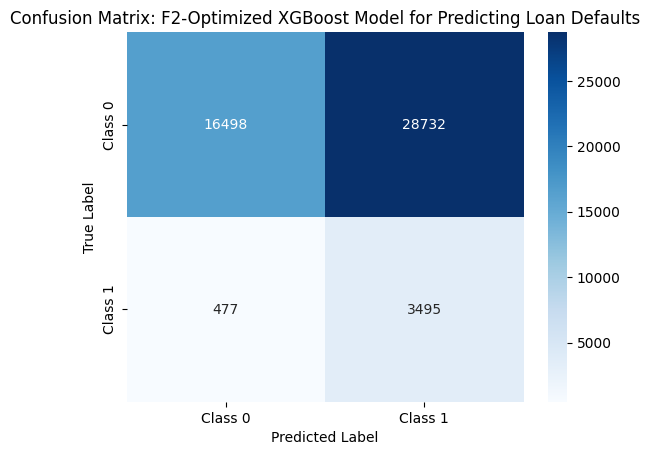

In [60]:
# 11. Prediction with the best model
best_model = xgb_random.best_estimator_
y_pred = best_model.predict(X_test)

# 12. Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# 13. Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: F2-Optimized XGBoost Model for Predicting Loan Defaults')
plt.show()

#### **Conclusions**

The high number of false positives (FP) in this model is justified by the prioritized focus on minimizing the risk of loan defaults. **The primary objective has been to conservatively identify cases that could result in defaults, even at the cost of misclassifying some repaid loans as defaults.** This approach is essential in a context where the economic risk of defaults is significant and it is preferable to err on the side of caution by rejecting some loans, rather than risk losing money on unpaid loans.

Additionally, given the class imbalance, the model has been designed to prioritize recall (sensitivity), ensuring that most defaults are captured, even if this increases false positives. This approach avoids approving loans that may subsequently default, which incurs a much higher cost than false positives.

In conclusion, the model sacrifices some precision to guarantee financial security, preventing greater losses from loan defaults and, therefore, reducing the overall risk of the portfolio.

---------------------------------------------------------------------------------------------------------------------------

#### **END OF NOTEBOOK 4**

In [61]:
# 1. Save the resampled training set (X_train_resampled + y_train_resampled) as CSV
pd.concat([X_train_resampled, y_train_resampled], axis=1).to_csv('../data/Processing_data/df_loans_train_resampled.csv', index=False)


# Crear la carpeta 'models' si no existe
os.makedirs('/Users/bris2/Desktop/GemaMaster/Aprendizaje/Practica1_EDA/models', exist_ok=True)

# Save the model
dump(xgb_random.best_estimator_, '/Users/bris2/Desktop/GemaMaster/Aprendizaje/Practica1_EDA/models/best_estimator.joblib')

# 3. Save the best parameters found in a CSV file
best_params_df = pd.DataFrame([xgb_random.best_params_])
best_params_df.to_csv('../data/Processing_data/best_xgb_params.csv', index=False)

##